<a href="https://colab.research.google.com/github/kabil3399/user-adoption/blob/main/guvi_task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from pandas.io.json import json_normalize
from datetime import datetime, timedelta
import scipy.stats
import matplotlib.dates as mdates
import plotly.graph_objects as go
plt.style.use('bmh')


In [2]:
import pandas as pd 
user =pd.read_csv("/content/takehome_users.csv",encoding = "cp1252")
user_eng =pd.read_csv("/content/takehome_user_engagement.csv",encoding = "cp1252")


In [3]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
user.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6.000500e+03,3.464246e+03,1.000000e+00,3.000750e+03,6.000500e+03,9.000250e+03,1.200000e+04
last_session_creation_time,8823.0,1.379279e+09,1.953116e+07,1.338452e+09,1.363195e+09,1.382888e+09,1.398443e+09,1.402067e+09
opted_in_to_mailing_list,12000.0,2.495000e-01,4.327417e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
enabled_for_marketing_drip,12000.0,1.493333e-01,3.564316e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
org_id,12000.0,1.418846e+02,1.240567e+02,0.000000e+00,2.900000e+01,1.080000e+02,2.382500e+02,4.160000e+02
invited_by_user_id,6417.0,5.962957e+03,3.383762e+03,3.000000e+00,3.058000e+03,5.954000e+03,8.817000e+03,1.199900e+04


In [5]:
user_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,113020.0,3210.55177,1770.305359,1.0,1769.0,3239.0,4713.0,6282.0
visited,113020.0,1.00000,0.000000,1.0,1.0,1.0,1.0,1.0


In [6]:
user_eng.user_id.nunique()

4599

In [7]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1.0,1.0
1,2013-11-15 03:45:04,2.0,1.0
2,2013-11-29 03:45:04,2.0,1.0
3,2013-12-09 03:45:04,2.0,1.0
4,2013-12-25 03:45:04,2.0,1.0


In [9]:
user['last_session_creation_time']= pd.to_datetime(user['last_session_creation_time'],unit='s')

In [10]:
user.last_session_creation_time.dtypes

dtype('<M8[ns]')

In [11]:
user.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0


In [12]:
user['last_session_creation_time'].min(), user['last_session_creation_time'].max()

(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50'))

In [15]:
user['creation_time'].min(), user['creation_time'].max()

('2012-05-31 00:43:27', '2014-05-30 23:59:19')

In [16]:
df=user_eng.copy()

In [17]:
df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1.0,1.0
1,2013-11-15 03:45:04,2.0,1.0
2,2013-11-29 03:45:04,2.0,1.0
3,2013-12-09 03:45:04,2.0,1.0
4,2013-12-25 03:45:04,2.0,1.0
...,...,...,...
113016,2013-12-20 14:29:35,6282.0,1.0
113017,2013-12-21 14:29:35,6282.0,1.0
113018,2013-12-22 14:29:35,6282.0,1.0
113019,2013-12-24 14:29:35,6282.0,1.0


In [19]:
df['date'] = pd.to_datetime(df['time_stamp'], errors='coerce') 

In [20]:
df.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1.0,1.0,2014-04-22 03:53:30
1,2013-11-15 03:45:04,2.0,1.0,2013-11-15 03:45:04
2,2013-11-29 03:45:04,2.0,1.0,2013-11-29 03:45:04
3,2013-12-09 03:45:04,2.0,1.0,2013-12-09 03:45:04
4,2013-12-25 03:45:04,2.0,1.0,2013-12-25 03:45:04


In [21]:
def rolling_count(df_group, frequency):
  return df_group.rolling(frequency,on="date")['user_id'].count()

In [22]:
df['visits_7_days'] = df.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,113020.0,3210.551770,1770.305359,1.0,1769.0,3239.0,4713.0,6282.0
visited,113020.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
visits_7_days,113020.0,4.412591,2.037912,1.0,3.0,5.0,6.0,7.0


In [24]:
df[df.visits_7_days >= 3.0]

,time_stamp,user_id,visited,date,visits_7_days
9,2014-02-09 03:45:04,2.0,1.0,2014-02-09 03:45:04,3.0
10,2014-02-13 03:45:04,2.0,1.0,2014-02-13 03:45:04,3.0
27,2013-02-19 22:08:03,10.0,1.0,2013-02-19 22:08:03,3.0
30,2013-03-02 22:08:03,10.0,1.0,2013-03-02 22:08:03,3.0
31,2013-03-05 22:08:03,10.0,1.0,2013-03-05 22:08:03,3.0
...,...,...,...,...,...
113015,2013-12-19 14:29:35,6282.0,1.0,2013-12-19 14:29:35,7.0
113016,2013-12-20 14:29:35,6282.0,1.0,2013-12-20 14:29:35,7.0
113017,2013-12-21 14:29:35,6282.0,1.0,2013-12-21 14:29:35,7.0
113018,2013-12-22 14:29:35,6282.0,1.0,2013-12-22 14:29:35,7.0


In [25]:
user_adopted= df.groupby('user_id')['visits_7_days'].max().reset_index()

In [27]:
user_adopted['adopted_user']=user_adopted['visits_7_days'].apply(lambda x:1 if x>=3 else 0)

In [28]:
user_adopted.head()

,user_id,visits_7_days,adopted_user
0,1.0,1.0,0
1,2.0,3.0,1
2,3.0,1.0,0
3,4.0,1.0,0
4,5.0,1.0,0


In [29]:
user_adopted['adopted_user'].value_counts()

0    3761
1     838
Name: adopted_user, dtype: int64

In [33]:
user_adopted.drop('visits_7_days',axis= 1, inplace=True)
user_adopted.rename(columns={"user_id":"object_id"},inplace=True)

In [34]:
user_adopted.head()

,object_id,adopted_user
0,1.0,0
1,2.0,1
2,3.0,0
3,4.0,0
4,5.0,0


In [35]:
user_adopted.set_index("object_id", inplace=True)

In [32]:
user_adopted.head()

,user_id,visits_7_days,adopted_user
0,1.0,1.0,0
1,2.0,3.0,1
2,3.0,1.0,0
3,4.0,1.0,0
4,5.0,1.0,0


In [36]:
df_users=user.join(user_adopted,on='object_id',how='left')

In [37]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [38]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  object        
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                4599 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)


In [40]:
df_users['last_session_creation_time'].fillna(0,inplace=True)
df_users['adopted_user'].fillna(0,inplace=True)

In [41]:
df_users.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6000.500000,3464.245950,1.0,3000.75,6000.5,9000.25,12000.0
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.00,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.00,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.00,108.0,238.25,416.0
invited_by_user_id,6417.0,5962.957145,3383.761968,3.0,3058.00,5954.0,8817.00,11999.0
adopted_user,12000.0,0.069833,0.254877,0.0,0.00,0.0,0.00,1.0


In [42]:
df_users['email_domain']=df_users['email'].apply(lambda x: x.split('@')[1])

In [43]:
df_users['email_domain'].value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
                  ... 
lrabg.com            1
mrytw.com            1
ugtav.com            1
hqhll.com            1
iuxiw.com            1
Name: email_domain, Length: 1184, dtype: int64

In [44]:
df_users[~df_users['invited_by_user_id'].isnull()].creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE'], dtype=object)

In [45]:
df_users.drop(['object_id', 'name', 'email', 'email_domain'],axis = 1,inplace=True)

In [46]:
df_users

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...,...
11995,2013-09-06 06:14:15,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0.0
11996,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN,0.0
11997,2014-04-27 12:45:16,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0.0
11998,2012-05-31 11:55:59,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN,0.0


In [47]:
df_users['invited_by_user_id'].fillna(0,inplace=True)

In [48]:
df_users

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...,...
11995,2013-09-06 06:14:15,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0.0
11996,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0,0.0
11997,2014-04-27 12:45:16,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0.0
11998,2012-05-31 11:55:59,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,0.0


In [49]:
user_eng

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1.0,1.0
1,2013-11-15 03:45:04,2.0,1.0
2,2013-11-29 03:45:04,2.0,1.0
3,2013-12-09 03:45:04,2.0,1.0
4,2013-12-25 03:45:04,2.0,1.0
...,...,...,...
113016,2013-12-20 14:29:35,6282.0,1.0
113017,2013-12-21 14:29:35,6282.0,1.0
113018,2013-12-22 14:29:35,6282.0,1.0
113019,2013-12-24 14:29:35,6282.0,1.0


In [50]:
df_users

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...,...
11995,2013-09-06 06:14:15,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0.0
11996,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0,0.0
11997,2014-04-27 12:45:16,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0.0
11998,2012-05-31 11:55:59,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,0.0


In [51]:
df_users['days_since_creation'] = (pd.to_datetime(user_eng['time_stamp'].max()) -  pd.to_datetime(df_users['creation_time'])).dt.days

In [52]:
df_users


,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_since_creation
0,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,45
1,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,203
2,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,443
3,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,381
4,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,505
...,...,...,...,...,...,...,...,...,...
11995,2013-09-06 06:14:15,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0.0,273
11996,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0,0.0,511
11997,2014-04-27 12:45:16,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0.0,40
11998,2012-05-31 11:55:59,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,0.0,736


In [53]:
df_users.drop(['creation_time', 'last_session_creation_time'],axis=1,inplace=True)

In [54]:
df_users=pd.get_dummies(df_users,columns=['creation_source'])

In [55]:
df_users.describe().T

,count,mean,std,min,25%,50%,75%,max
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.0,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.0,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.0,108.0,238.25,416.0
invited_by_user_id,12000.0,3188.691333,3869.027693,0.0,0.0,875.0,6317.00,11999.0
adopted_user,12000.0,0.069833,0.254877,0.0,0.0,0.0,0.00,1.0
days_since_creation,12000.0,324.568000,216.646173,6.0,129.0,304.0,506.00,736.0
creation_source_GUEST_INVITE,12000.0,0.180250,0.384412,0.0,0.0,0.0,0.00,1.0
creation_source_ORG_INVITE,12000.0,0.354500,0.478381,0.0,0.0,0.0,1.00,1.0
creation_source_PERSONAL_PROJECTS,12000.0,0.175917,0.380765,0.0,0.0,0.0,0.00,1.0
creation_source_SIGNUP,12000.0,0.173917,0.379054,0.0,0.0,0.0,0.00,1.0


In [56]:
df_users.corr()['adopted_user']

opted_in_to_mailing_list              0.011273
enabled_for_marketing_drip            0.002622
org_id                                0.043458
invited_by_user_id                    0.015058
adopted_user                          1.000000
days_since_creation                   0.070673
creation_source_GUEST_INVITE          0.039936
creation_source_ORG_INVITE           -0.002783
creation_source_PERSONAL_PROJECTS    -0.056178
creation_source_SIGNUP                0.003673
creation_source_SIGNUP_GOOGLE_AUTH    0.018707
Name: adopted_user, dtype: float64

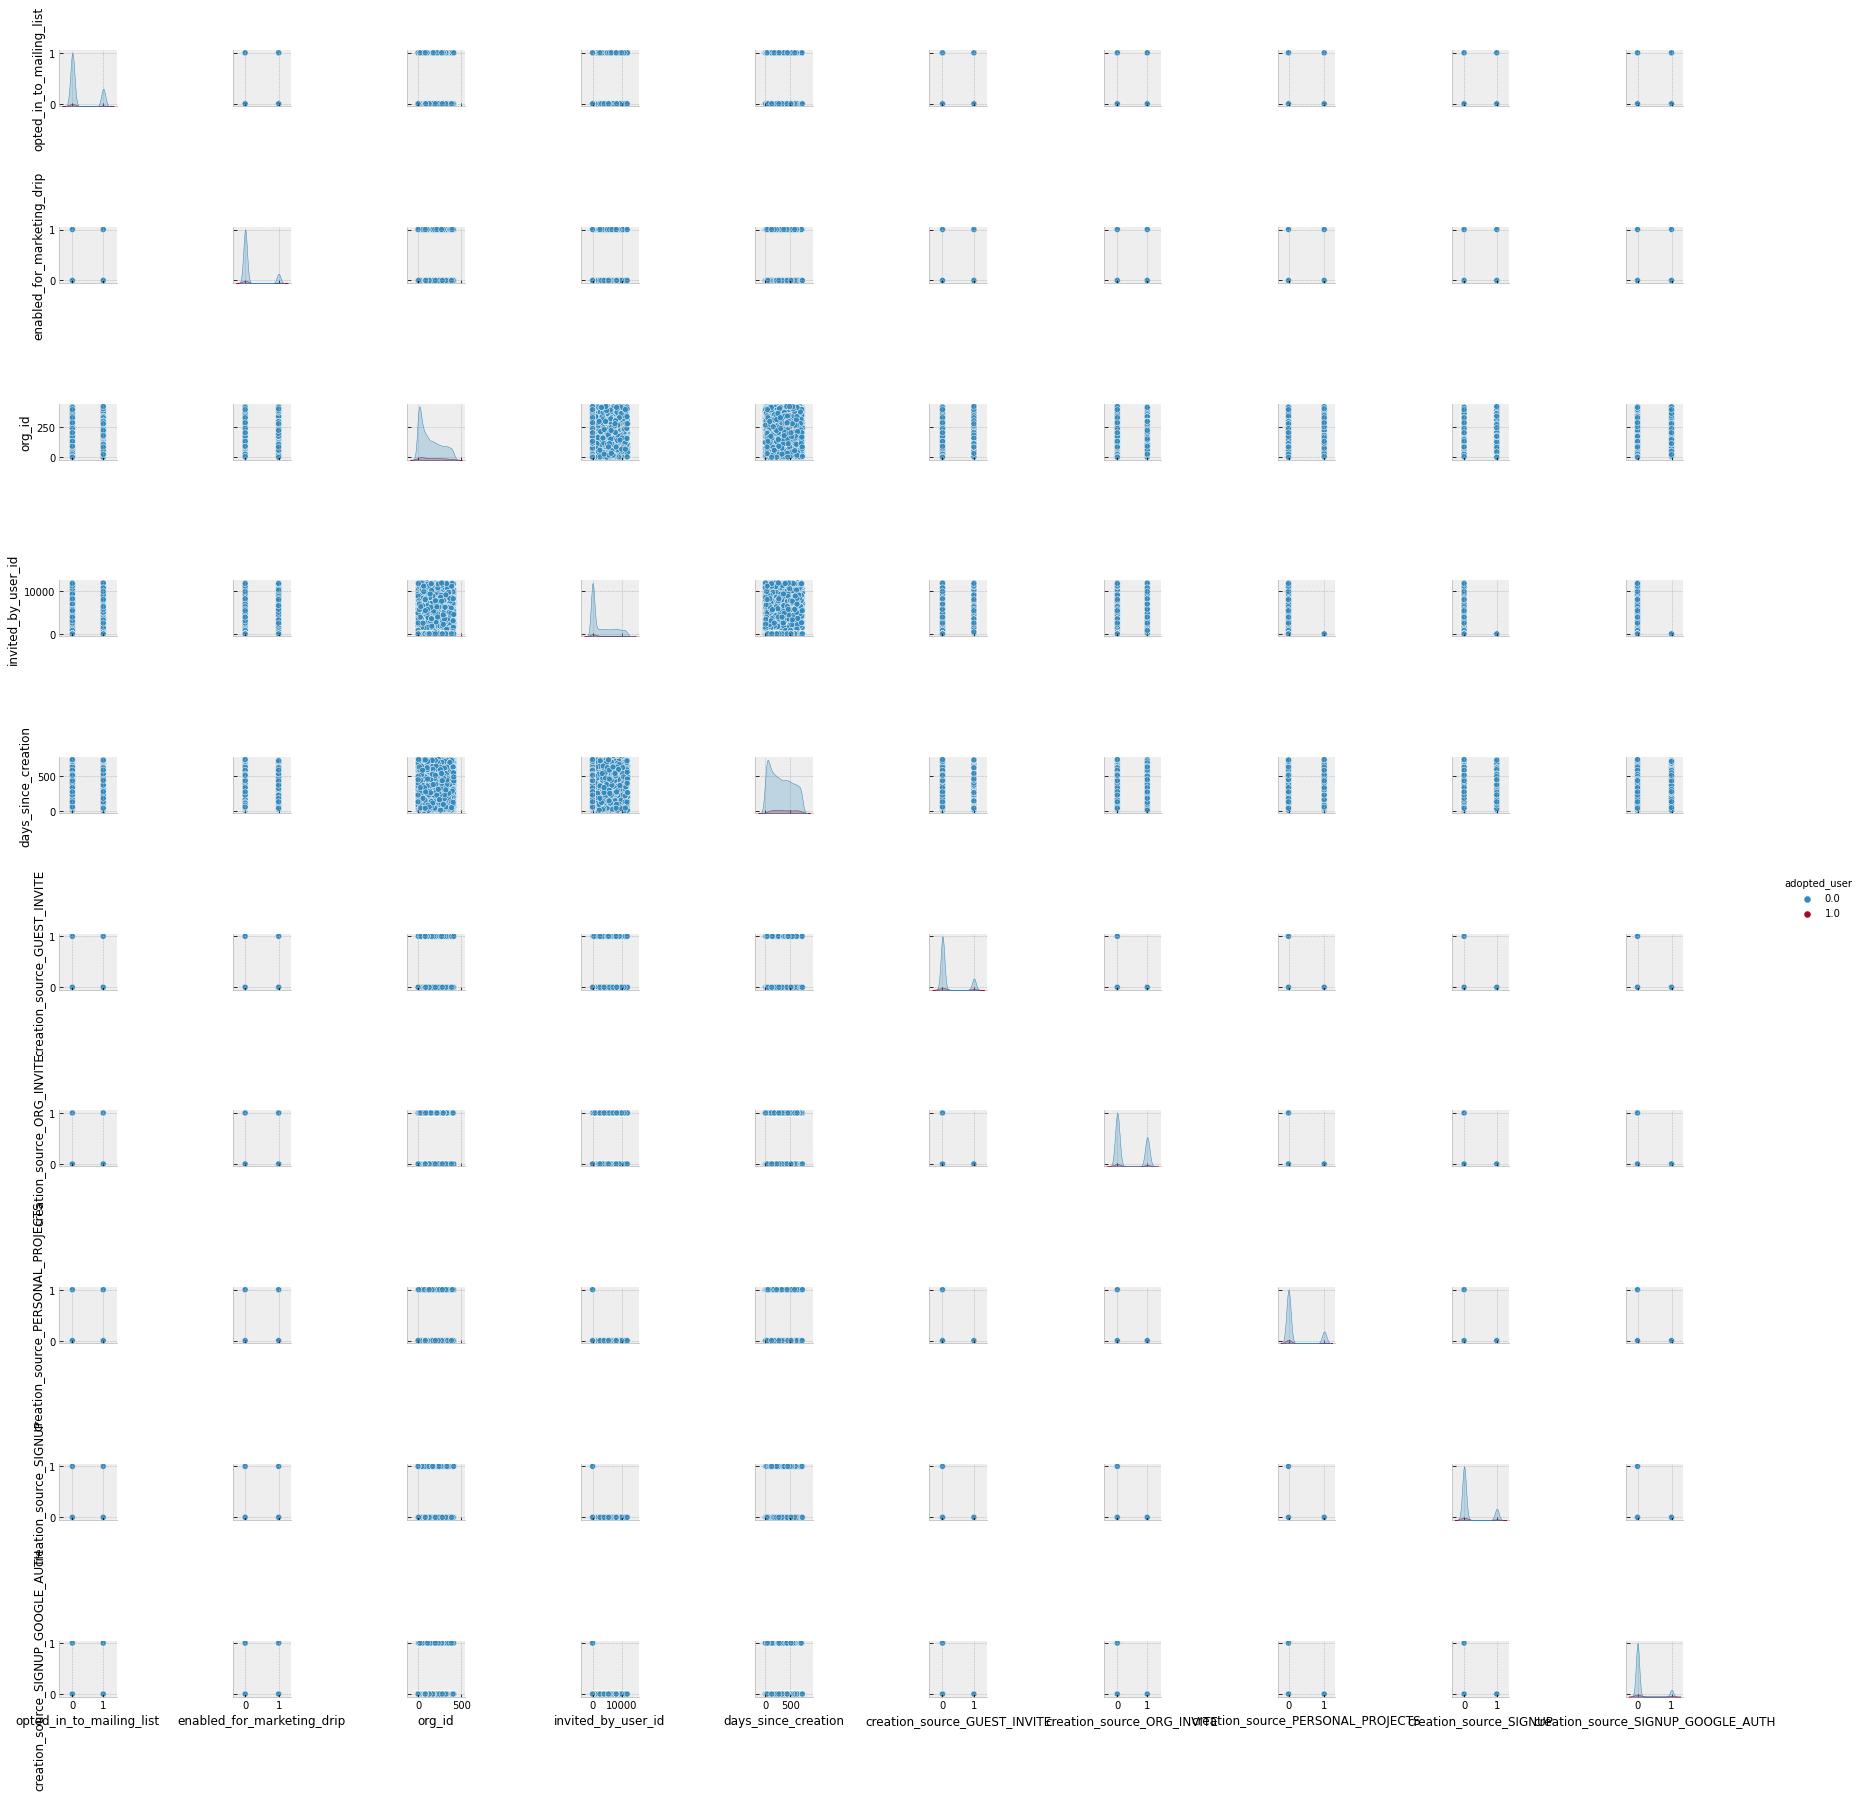

In [57]:
sns.pairplot(df_users,hue='adopted_user')

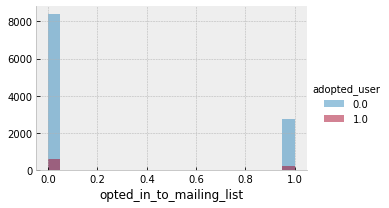

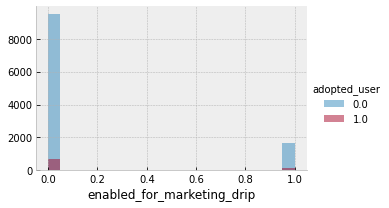

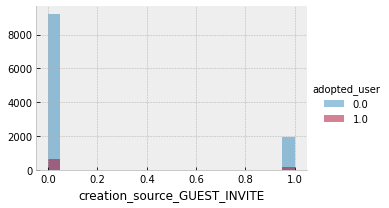

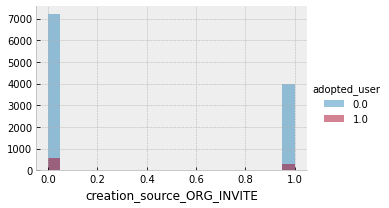

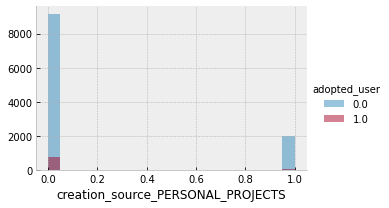

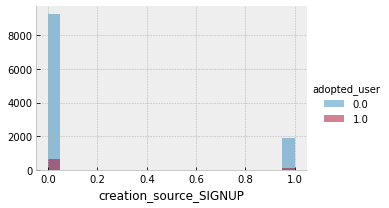

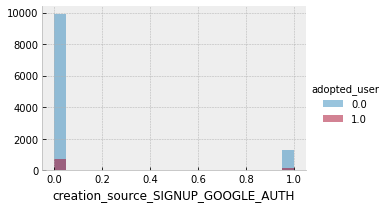

In [58]:
for col in ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'creation_source_GUEST_INVITE',
           'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
           'creation_source_SIGNUP_GOOGLE_AUTH']:
           g=sns.FacetGrid(df_users,hue="adopted_user",height=3,aspect=1.5)
           g.map(plt.hist,col,alpha=0.5,bins=20)
           g.add_legend()


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score,\
precision_score, recall_score, f1_score

In [60]:
def cv_optimize(model,parameters,xtrain,ytrain,n_folds=5):
  clf=GridSearchCV(model,param_grid=parameters,cv=n_folds,scoring='accuracy')
  t0=time.time()
  clf.fit(xtrain,ytrain)
  time_fit=time.time()- t0
  print('\n\n\n=============================',type(model).__name__,'=================================\n')
  print("it takes%.3f sec for turning" % (time_fit))
  print("best params",clf.best_params_)
  best=clf.best_estimator_
  return best
def do_classify(model, parameters, df, targetname, scale = True, cols_to_transform = 'numeric', 
                featurenames = 'all', train_size = 0.8):
  if featurenames=="all":
    x=df.drop([targetname],axis=1)
  else:
    x=df[featurenames]
  y=df[targetname]
  Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, train_size = train_size)

  model = cv_optimize(model, parameters, Xtrain, ytrain)
  t0 = time.time()
  model = model.fit(Xtrain, ytrain)
  time_fit = time.time() - t0 
  print("It takes %.3f seconds for fitting" % (time_fit))
  training_accuracy = model.score(Xtrain, ytrain)
  test_accuracy = model.score(Xtest, ytest)
  precision = precision_score(ytest, model.predict(Xtest))
  recall = recall_score(ytest, model.predict(Xtest))
  AUC = roc_auc_score(ytest, model.predict_proba(Xtest)[:,1])
            
  print("Accuracy on training data: {:0.2f}".format(training_accuracy))
  print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
  print("Precision on test data:    {:0.2f}".format(precision))
  print("Recall on test data:       {:0.2f}".format(recall))
  print("AUC on test data:          {:0.2f}".format(AUC))
  print("=======Confusion Matrix=========")
  print(confusion_matrix(ytest, model.predict(Xtest)))
  print("=======Classification report=======")
  print(classification_report(ytest, model.predict(Xtest)))
  print("="*100)
  print("="*100)
  print("="*100)
  return model, Xtrain, ytrain, Xtest, ytest


In [61]:
from tables.file import parameters
model_rf=RandomForestClassifier(class_weight='balanced')
parameters_rf={
                 'n_estimators': [10, 25, 50, 75, 100],
                 'criterion': ["gini", "entropy"],
                 'max_depth': [3, 6, 10, 12],
                 'max_features': ['auto', 'sqrt']
              }

    
    

In [62]:
model_rf, Xtrain, ytrain, Xtest, ytest = do_classify(model_rf, parameters_rf, df_users, targetname = 'adopted_user')





============================= RandomForestClassifier =================================

it takes141.541 sec for turning
best params {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 100}
It takes 0.901 seconds for fitting
Accuracy on training data: 0.89
Accuracy on test data:     0.82
Precision on test data:    0.11
Recall on test data:       0.25
AUC on test data:          0.63
=======Confusion Matrix=========
[[1932  309]
 [ 119   40]]
=======Classification report=======
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90      2241
         1.0       0.11      0.25      0.16       159

    accuracy                           0.82      2400
   macro avg       0.53      0.56      0.53      2400
weighted avg       0.89      0.82      0.85      2400



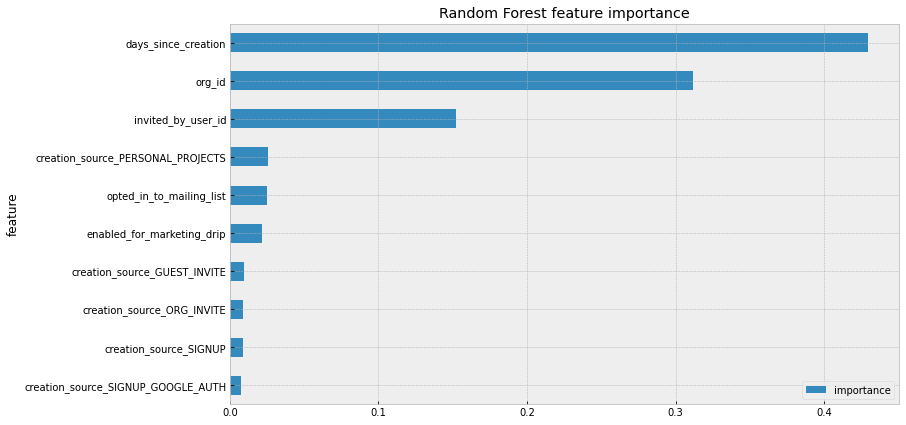

In [63]:
feat_imp = pd.DataFrame({'importance':model_rf.feature_importances_})    
feat_imp['feature'] = Xtrain.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
_ = feat_imp.plot.barh(title = 'Random Forest feature importance', figsize = (12,7))



1.   days_since_creation
2.   org_id

1.   invited_by_user_id
2.   creation_source_PERSONAL_PROJECTS

1.   opted_in_to_mailing_list	

these are the top 5 important features





